<a href="https://colab.research.google.com/github/rktombe/html-css-and-javascript-building-the-web-4479542/blob/main/Practical_1_Deep_Learning_Implementing_a_Neural_Network_ACMP_466_COMP_475_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Implementing and Training a Neural Network**

 **Building Neural Networks Using the Keras API**

Keras is a high-level deep learning API that runs on top of TensorFlow. It simplifies the process of building, training, and evaluating neural networks. In this tutorial, we'll walk through the steps of creating, training, and evaluating a neural network using the Keras API. We'll use the MNIST dataset for handwritten digit classification.

**1. Import Required Libraries**
TensorFlow, Keras, and Matplotlib for visualization.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

**Step 2: Load and Preprocess the Data**

We'll use the MNIST dataset, which is available in Keras.

Preprocess the data: This includes reshaping the input data to fit the model's input shape (28, 28, 1), normalizing pixel values to the range [0, 1], and converting the labels to one-hot encoded vectors using to_categorical

In [3]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values to range [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape data to include channel dimension (required for Conv2D layers)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255

# Convert class vectors to binary class matrices (one-hot encoding)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

**3. Build the Neural Network**

create a Convolutional Neural Network (CNN) using Keras' Sequential API.

In [4]:
# Define the model
model = models.Sequential()

# Add layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  # Output layer for 10 classes

# Print model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

**4. Compile the Model**
Specify the optimizer, loss function, and metrics.

In [5]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

**5. Train the Model**
Train the model on the training data.

In [7]:
# Train the model
history = model.fit(X_train, y_train, epochs=3, batch_size=64, validation_split=0.2)

Epoch 1/3
750/750 ━━━━━━━━━━━━━━━━━━━━ 45s 60ms/step - accuracy: 0.9815 - loss: 0.0615 - val_accuracy: 0.9844 - val_loss: 0.0528
Epoch 2/3
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 60ms/step - accuracy: 0.9886 - loss: 0.0393 - val_accuracy: 0.9876 - val_loss: 0.0387
Epoch 3/3
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 60ms/step - accuracy: 0.9900 - loss: 0.0282 - val_accuracy: 0.9887 - val_loss: 0.0382


**6. Evaluate the Model**
Evaluate the model on the test data.

In [8]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9864 - loss: 0.0427
Test Accuracy: 98.83%


**7. Visualize Training Results**
Plot the training and validation accuracy/loss over epochs.

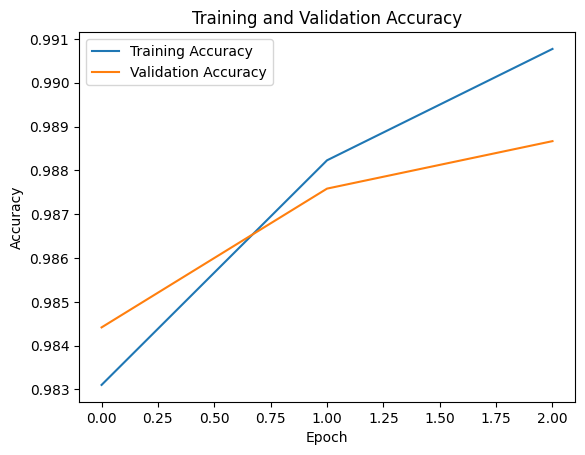

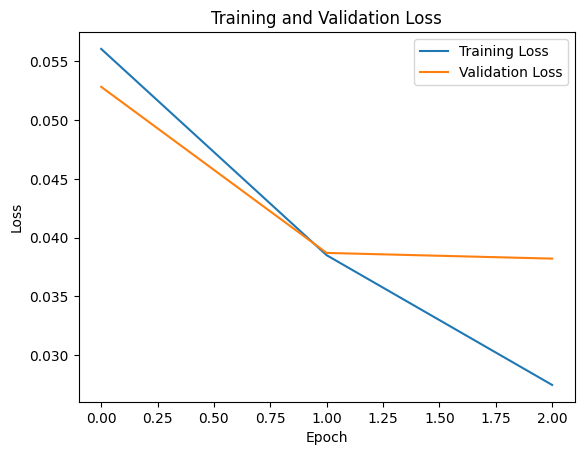

In [9]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

**8. Make Predictions**
Use the trained model to make predictions on new data.

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


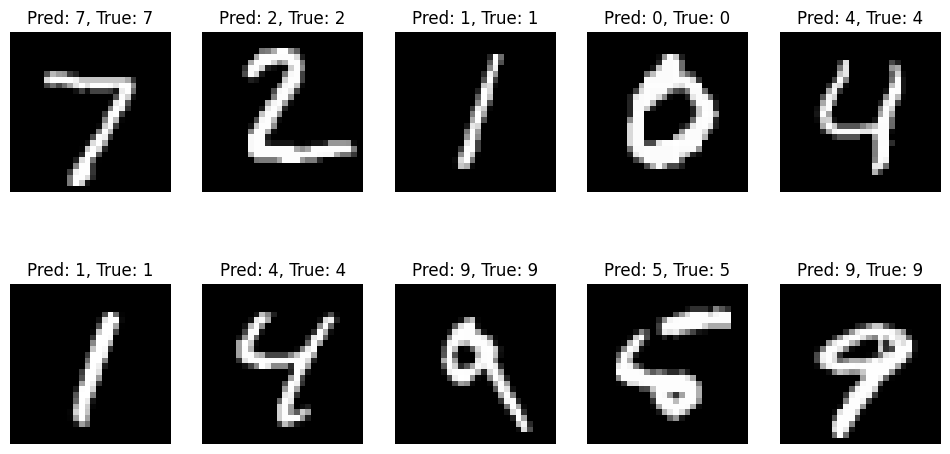

In [10]:
# Predict on test data
predictions = model.predict(X_test)

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Visualize some predictions
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(X_test[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"Pred: {predicted_labels[i]}, True: {true_labels[i]}")
    ax.axis('off')
plt.show()

**Explanation of Key Concepts:**
Sequential API: A linear stack of layers, where each layer has exactly one input and one output tensor.

Convolutional Layers: Extract features from images using filters.

Pooling Layers: Reduce spatial dimensions while retaining important information.

Dense Layers: Fully connected layers for classification.

Softmax Activation: Outputs probabilities for each class.

Adam Optimizer: An adaptive learning rate optimization algorithm.

Categorical Crossentropy Loss: Suitable for multi-class classification.

**More Practice**
Experiment with different architectures (e.g., more layers, different activation functions).

Use callbacks (e.g., EarlyStopping, ModelCheckpoint) to improve training.

Explore transfer learning by using pre-trained models like VGG or ResNet.

Apply the model to other datasets (e.g., CIFAR-10, Fashion MNIST).